In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = cifar100.load_data()

169009152/169001437 [==============================] - 89s 1us/step


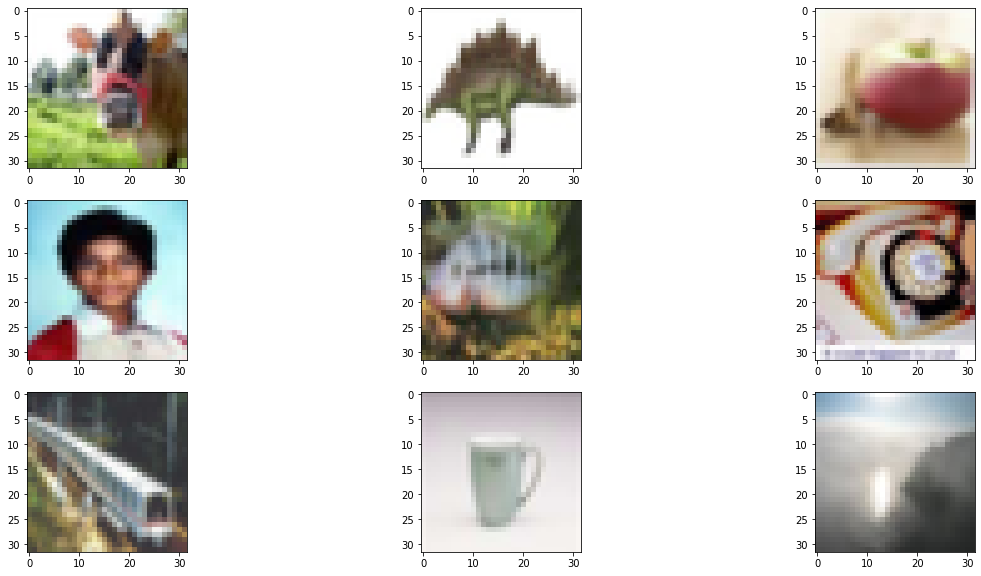

In [5]:
NUMBER = 9
plt.figure(figsize=(20,10))

for i in range(NUMBER):
    plt.subplot(330+i+1)
    plt.imshow(train_x[i])
    
plt.show()

## Convert the pixel values of the dataset to float type and then normalize the dataset

In [6]:
train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

## One-hot encoding

In [7]:
from keras.utils import np_utils

In [8]:
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)

num_classes = train_y.shape[1]
num_classes

100

# Creating the model

In [9]:
import tensorflow as tf

In [10]:
modelo = tf.keras.Sequential()

In [11]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=[32,32,3], padding='same', activation='relu',
                                 kernel_constraint=tf.keras.constraints.max_norm(3)))
modelo.add(tf.keras.layers.Dropout(0.2))

In [12]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',
                                 kernel_constraint=tf.keras.constraints.max_norm(3)))
modelo.add(tf.keras.layers.Dropout(0.2))

In [13]:
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
modelo.add(tf.keras.layers.Flatten())

In [15]:
modelo.add(tf.keras.layers.Dense(units=756, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(3)))
modelo.add(tf.keras.layers.Dropout(0.2))

In [17]:
modelo.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

# Configure the optimizer and compile the model

In [18]:
from keras.optimizers import SGD

In [19]:
sgd = SGD(learning_rate=0.01, momentum=0.5, decay=(0.01/25), nesterov=False)

modelo.compile(optimizer=sgd, loss='categorical_crossentropy', metrics='accuracy')

In [20]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 756)               6

# Training the model

In [21]:
modelo.fit(x=train_x, y=train_y, validation_data=(test_x, test_y), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 386s 243ms/step - loss: 4.3003 - accuracy: 0.0539 - val_loss: 3.7575 - val_accuracy: 0.1494
Epoch 2/10
1563/1563 [==============================] - 360s 230ms/step - loss: 3.6351 - accuracy: 0.1535 - val_loss: 3.5181 - val_accuracy: 0.1968
Epoch 3/10
1563/1563 [==============================] - 299s 192ms/step - loss: 3.3837 - accuracy: 0.1980 - val_loss: 3.3448 - val_accuracy: 0.2227
Epoch 4/10
1563/1563 [==============================] - 281s 180ms/step - loss: 3.2218 - accuracy: 0.2273 - val_loss: 3.2584 - val_accuracy: 0.2424
Epoch 5/10
1563/1563 [==============================] - 280s 179ms/step - loss: 3.1003 - accuracy: 0.2510 - val_loss: 3.1982 - val_accuracy: 0.2493
Epoch 6/10
1563/1563 [==============================] - 279s 178ms/step - loss: 3.0035 - accuracy: 0.2695 - val_loss: 3.1185 - val_accuracy: 0.2601
Epoch 7/10
1563/1563 [==============================] - 286s 183ms/step - loss: 2.9211 - accuracy: 0.2836 - val_

# Calculate the accuracy

In [22]:
_, acc = modelo.evaluate(test_x, test_y)
print(acc*100)

313/313 [==============================] - 10s 22ms/step - loss: 2.9685 - accuracy: 0.2889
28.88999879360199


In [29]:
classes = ["beaver", "dolphin", "otter", "seal", "whale",
          "fish", "flatfish", "ray", "shark", "trout",
"orchids", "poppies", "roses", "sunflowers", "tulips",
"bottles", "bowls", "cans", "cups", "plates",
"apples", "mushrooms", "oranges", "pears", "sweet peppers",
"clock", "computer keyboard", "lamp", "telephone", "television",
"bed", "chair", "couch", "table", "wardrobe",
"bee", "beetle", "butterfly", "caterpillar", "cockroach",
"bear", "leopard", "lion", "tiger", "wolf",
"bridge", "castle", "house", "road", "skyscraper",
"cloud", "forest", "mountain", "plain", "sea",
"camel", "cattle", "chimpanzee", "elephant", "kangaroo",
"fox", "porcupine", "possum", "raccoon", "skunk",
"crab", "lobster", "snail", "spider", "worm",
"baby", "boy", "girl", "man", "woman",
"crocodile", "dinosaur", "lizard", "snake", "turtle",
"hamster", "mouse", "rabbit", "shrew", "squirrel",
"maple", "oak", "palm", "pine", "willow",
"bicycle", "bus", "motorcycle", "pickup truck", "train",
"lawn-mower", "rocket", "streetcar", "tank", "tractor"]

results={}
for i in range(100):
    results[i] = classes[i]

from PIL import Image
import numpy as np
im=Image.open("417px-Red_rose.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=modelo.predict_classes([im])[0]
print(pred,results[pred])

C:\Users\User\anaconda3\envs\test\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


70 baby
